# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [63]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import datetime as dt  

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low = -90, high = 90, size=1500)
lngs = np.random.uniform(low = -180, high = 180, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)
# cities

629

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:


count = 0
Cloudiness = []
Country = []
Date = []
Humidity = []
Lat = []
Lng = []
Max_Temp = []
Wind_Speed = []

print(f"Beginning Data Retrieval")
print(f"------------------------------")
for city in cities:
        url = (f'https://api.openweathermap.org/data/2.5/weather?q={city}&units=imperial&appid={weather_api_key}')
#         print(url)
        weather_response = requests.get(url)
        weather_json = weather_response.json()
#         print(weather_json)
        try: 
            Cloudiness.append(weather_json['clouds']["all"])
            Country.append(weather_json['sys']["country"])
            Date.append(weather_json["dt"])
            Humidity.append(weather_json["main"]['humidity'])
            Lat.append(weather_json["coord"]['lat'])
            Lng.append(weather_json["coord"]['lon'])
            Max_Temp.append(weather_json["main"]['temp_max'])
            Wind_Speed.append(weather_json["wind"]['speed'])
            print( "Requesting " , count,"......" ,city)
            count = count + 1
            
        except KeyError:
        
            Cloudiness.append("")
            Country.append("")
            Date.append("")
            Humidity.append("")
            Lat.append("")
            Lng.append("")
            Max_Temp.append("")
            Wind_Speed.append("")
            print("Requesting " , count,"......" ,city, ".....Empty value, try again...")
            count = count + 1
# print(Cloudiness)
#             pass

Beginning Data Retrieval
------------------------------
Requesting  0 ...... puerto ayora
Requesting  1 ...... busselton
Requesting  2 ...... ossora
Requesting  3 ...... hofn
Requesting  4 ...... cherskiy
Requesting  5 ...... ushuaia
Requesting  6 ...... carnarvon
Requesting  7 ...... taolanaro .....Empty value, try again...
Requesting  8 ...... onega
Requesting  9 ...... yellowknife
Requesting  10 ...... peniche
Requesting  11 ...... kodiak
Requesting  12 ...... sitka
Requesting  13 ...... carutapera
Requesting  14 ...... belushya guba .....Empty value, try again...
Requesting  15 ...... hilo
Requesting  16 ...... bambous virieux
Requesting  17 ...... juneau
Requesting  18 ...... sao joao da barra
Requesting  19 ...... cape town
Requesting  20 ...... palabuhanratu .....Empty value, try again...
Requesting  21 ...... hobart
Requesting  22 ...... airai
Requesting  23 ...... jamestown
Requesting  24 ...... rikitea
Requesting  25 ...... cam ranh
Requesting  26 ...... norman wells
Requesti

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [106]:
#display the data frame
cities_df = pd.DataFrame({
                            "City" : cities, 
                            "Cloudiness" : Cloudiness,
                            "Country" : Country, 
                            "Date" : Date,
                            "Humidity" : Humidity, 
                            "Lat" : Lat,
                            "Lng" : Lng,
                            "Max_Temp" : Max_Temp,
                            "Wind_Speed" : Wind_Speed
                        })
cities_df

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max_Temp,Wind_Speed
0,puerto ayora,75,EC,1595196317,73,-0.74,-90.35,75.2,13.87
1,busselton,54,AU,1595196586,76,-33.65,115.33,46.99,8.34
2,ossora,96,RU,1595196649,88,59.24,163.07,52.48,13.89
3,hofn,39,IS,1595196614,57,64.25,-15.21,55.54,9.22
4,cherskiy,0,RU,1595196598,46,68.75,161.3,70.34,7.29
...,...,...,...,...,...,...,...,...,...
624,san quintin,0,MX,1595196800,54,30.48,-115.95,77.86,20.07
625,cidreira,66,BR,1595196801,77,-30.18,-50.21,66.42,10.36
626,wanxian,100,CN,1595196801,80,30.8,108.39,75.31,2.24
627,conde,20,BR,1595196801,88,-7.26,-34.91,77,6.93


In [107]:
cities_df.count()

City          629
Cloudiness    629
Country       629
Date          629
Humidity      629
Lat           629
Lng           629
Max_Temp      629
Wind_Speed    629
dtype: int64

In [101]:
#save the file into a CSV file in the Resources Folder
cities_df.to_csv("Resources/cities.csv", encoding="utf-8", index=False)

In [108]:
cities_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 629 entries, 0 to 628
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   City        629 non-null    object
 1   Cloudiness  629 non-null    object
 2   Country     629 non-null    object
 3   Date        629 non-null    object
 4   Humidity    629 non-null    object
 5   Lat         629 non-null    object
 6   Lng         629 non-null    object
 7   Max_Temp    629 non-null    object
 8   Wind_Speed  629 non-null    object
dtypes: object(9)
memory usage: 44.4+ KB


In [109]:
cities_df

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max_Temp,Wind_Speed
0,puerto ayora,75,EC,1595196317,73,-0.74,-90.35,75.2,13.87
1,busselton,54,AU,1595196586,76,-33.65,115.33,46.99,8.34
2,ossora,96,RU,1595196649,88,59.24,163.07,52.48,13.89
3,hofn,39,IS,1595196614,57,64.25,-15.21,55.54,9.22
4,cherskiy,0,RU,1595196598,46,68.75,161.3,70.34,7.29
...,...,...,...,...,...,...,...,...,...
624,san quintin,0,MX,1595196800,54,30.48,-115.95,77.86,20.07
625,cidreira,66,BR,1595196801,77,-30.18,-50.21,66.42,10.36
626,wanxian,100,CN,1595196801,80,30.8,108.39,75.31,2.24
627,conde,20,BR,1595196801,88,-7.26,-34.91,77,6.93


In [112]:
nan_value = float("NaN")
cities_df.replace("", nan_value, inplace = True)
cities_df.dropna(subset = ["Cloudiness"], inplace = True)
cities_df.dropna(subset = ["Country"], inplace = True)
cities_df.dropna(subset = ["Cloudiness"], inplace = True)
cities_df.dropna(subset = ["Date"], inplace = True)
cities_df.dropna(subset = ["Humidity"], inplace = True)
cities_df.dropna(subset = ["Lat"], inplace = True)
cities_df.dropna(subset = ["Lng"], inplace = True)
cities_df.dropna(subset = ["Max_Temp"], inplace = True)
cities_df.dropna(subset = ["Wind_Speed"], inplace = True)
clean_city_data_df = cities_df
clean_city_data_df

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max_Temp,Wind_Speed
0,puerto ayora,75.0,EC,1.595196e+09,73.0,-0.74,-90.35,75.20,13.87
1,busselton,54.0,AU,1.595197e+09,76.0,-33.65,115.33,46.99,8.34
2,ossora,96.0,RU,1.595197e+09,88.0,59.24,163.07,52.48,13.89
3,hofn,39.0,IS,1.595197e+09,57.0,64.25,-15.21,55.54,9.22
4,cherskiy,0.0,RU,1.595197e+09,46.0,68.75,161.30,70.34,7.29
...,...,...,...,...,...,...,...,...,...
623,roald,12.0,NO,1.595197e+09,87.0,62.58,6.13,53.60,6.93
624,san quintin,0.0,MX,1.595197e+09,54.0,30.48,-115.95,77.86,20.07
625,cidreira,66.0,BR,1.595197e+09,77.0,-30.18,-50.21,66.42,10.36
626,wanxian,100.0,CN,1.595197e+09,80.0,30.80,108.39,75.31,2.24


In [113]:
clean_city_data_df.count()

City          566
Cloudiness    566
Country       566
Date          566
Humidity      566
Lat           566
Lng           566
Max_Temp      566
Wind_Speed    566
dtype: int64

In [114]:
clean_city_data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 566 entries, 0 to 627
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        566 non-null    object 
 1   Cloudiness  566 non-null    float64
 2   Country     566 non-null    object 
 3   Date        566 non-null    float64
 4   Humidity    566 non-null    float64
 5   Lat         566 non-null    float64
 6   Lng         566 non-null    float64
 7   Max_Temp    566 non-null    float64
 8   Wind_Speed  566 non-null    float64
dtypes: float64(7), object(2)
memory usage: 44.2+ KB


In [65]:
#Save the new clean file in the same folder as the other file
clean_city_data_df.to_csv("Resources/clean_cities.csv", encoding="utf-8", index=False)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [119]:
clean_city_data_hum_df = clean_city_data_df[clean_city_data_df["Humidity"]>100]
clean_city_data_hum_df

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max_Temp,Wind_Speed


There are no cities with Humidity higher tham 100, so we proceed to next step

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

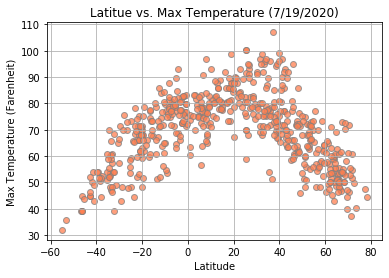

<Figure size 432x288 with 0 Axes>

In [120]:
lat = clean_city_data_df ["Lat"]
temp = clean_city_data_df ["Max_Temp"]

plt.scatter(lat, temp,color="coral", edgecolors="grey", alpha=0.75)
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (Farenheit)")
plt.title("Latitue vs. Max Temperature (7/19/2020)")
plt.grid()
plt.show()
plt.savefig("Figures/Plot_Lat_vs_Temp.png")

## Latitude vs. Humidity Plot

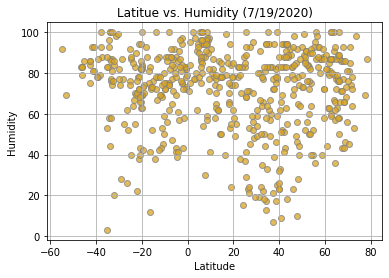

<Figure size 432x288 with 0 Axes>

In [121]:
lat = clean_city_data_df ["Lat"]
hum = clean_city_data_df ["Humidity"]

plt.scatter(lat, hum,color="goldenrod", edgecolors="grey", alpha=0.75)
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Latitue vs. Humidity (7/19/2020)")
plt.grid()
plt.show()
plt.savefig("Figures/Plot_Lat_vs_Humidity.png")

## Latitude vs. Cloudiness Plot

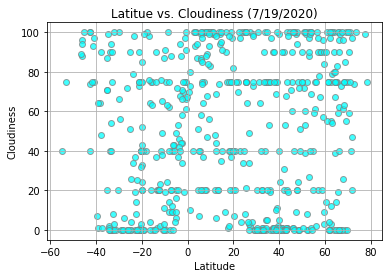

<Figure size 432x288 with 0 Axes>

In [122]:
lat = clean_city_data_df ["Lat"]
cloud = clean_city_data_df ["Cloudiness"]

plt.scatter(lat, cloud,color="aqua", edgecolors="grey", alpha=0.75)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Latitue vs. Cloudiness (7/19/2020)")
plt.grid()
plt.show()
plt.savefig("Figures/Plot_Lat_vs_Cloudiness.png")

## Latitude vs. Wind Speed Plot

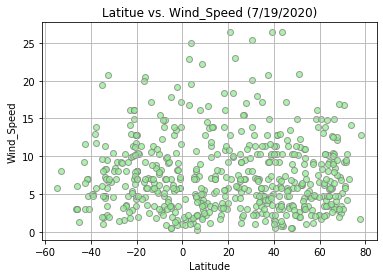

<Figure size 432x288 with 0 Axes>

In [123]:
lat = clean_city_data_df ["Lat"]
wind = clean_city_data_df ["Wind_Speed"]

plt.scatter(lat, wind,color="lightgreen", edgecolors="grey", alpha=0.75)
plt.xlabel("Latitude")
plt.ylabel("Wind_Speed")
plt.title("Latitue vs. Wind_Speed (7/19/2020)")
plt.grid()
plt.show()
plt.savefig("Figures/Plot_Lat_vs_WindSpeed.png")

## Linear Regression

In [53]:
# Create Northern and Southern Hemisphere DataFrames
northern_hemisphere_df = clean_city_data_df[clean_city_data_df["Lat"]>0]
northern_hemisphere_df

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max_Temp,Wind_Speed
2,ossora,96.0,RU,1.595197e+09,88.0,59.24,163.07,52.48,13.89
3,hofn,39.0,IS,1.595197e+09,57.0,64.25,-15.21,55.54,9.22
4,cherskiy,0.0,RU,1.595197e+09,46.0,68.75,161.30,70.34,7.29
8,onega,0.0,RU,1.595197e+09,67.0,63.91,38.14,58.89,5.61
9,yellowknife,75.0,CA,1.595197e+09,60.0,62.46,-114.35,71.01,13.87
...,...,...,...,...,...,...,...,...,...
618,puerto berrio,64.0,CO,1.595197e+09,54.0,6.49,-74.40,90.84,2.17
619,reforma,2.0,MX,1.595197e+09,65.0,18.10,-91.02,89.49,5.55
623,roald,12.0,NO,1.595197e+09,87.0,62.58,6.13,53.60,6.93
624,san quintin,0.0,MX,1.595197e+09,54.0,30.48,-115.95,77.86,20.07


In [54]:
southern_hemisphere_df = clean_city_data_df[clean_city_data_df["Lat"]<0]
southern_hemisphere_df

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max_Temp,Wind_Speed
0,puerto ayora,75.0,EC,1.595196e+09,73.0,-0.74,-90.35,75.20,13.87
1,busselton,54.0,AU,1.595197e+09,76.0,-33.65,115.33,46.99,8.34
5,ushuaia,40.0,AR,1.595197e+09,92.0,-54.80,-68.30,32.00,5.82
6,carnarvon,0.0,AU,1.595196e+09,87.0,-24.87,113.63,48.20,8.05
13,carutapera,97.0,BR,1.595197e+09,83.0,-1.20,-46.02,76.89,6.98
...,...,...,...,...,...,...,...,...,...
620,jaru,87.0,BR,1.595197e+09,50.0,-10.44,-62.47,84.31,2.95
621,fare,76.0,PF,1.595197e+09,81.0,-16.70,-151.02,77.58,19.98
622,santiago del estero,6.0,AR,1.595197e+09,55.0,-27.80,-64.26,75.58,1.36
625,cidreira,66.0,BR,1.595197e+09,77.0,-30.18,-50.21,66.42,10.36


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

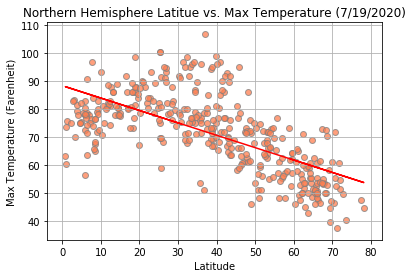

 R-squared is 0.4350542106844266


<Figure size 432x288 with 0 Axes>

In [136]:
n_lat = northern_hemisphere_df ["Lat"]
n_temp = northern_hemisphere_df ["Max_Temp"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(n_lat, n_temp)
regress_values = n_lat * slope + intercept
line_eq = "y = " + str(round(slope,4)) + "x + " + str(round(intercept,4))
plt.plot(n_lat,regress_values,"r-")
plt.scatter(n_lat, n_temp,color="coral", edgecolors="grey", alpha=0.75)
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (Farenheit)")
plt.title("Northern Hemisphere Latitue vs. Max Temperature (7/19/2020)")
plt.grid()
plt.show()
plt.savefig("Figures/Regression_North_Lat_vs_Temperature.png")
print(f" R-squared is {rvalue**2}")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

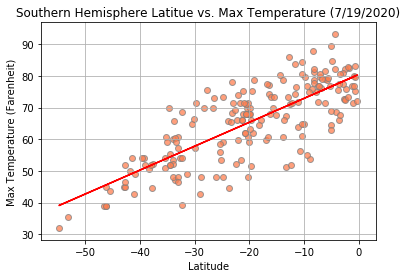

 R-squared is 0.6190941574242075


<Figure size 432x288 with 0 Axes>

In [137]:
s_lat = southern_hemisphere_df ["Lat"]
s_temp = southern_hemisphere_df ["Max_Temp"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(s_lat, s_temp)
regress_values = s_lat * slope + intercept
line_eq = "y = " + str(round(slope,4)) + "x + " + str(round(intercept,4))
plt.plot(s_lat,regress_values,"r-")
plt.scatter(s_lat, s_temp,color="coral", edgecolors="grey", alpha=0.75)
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (Farenheit)")
plt.title("Southern Hemisphere Latitue vs. Max Temperature (7/19/2020)")
plt.grid()
plt.show()
plt.savefig("Figures/Regression_South_Lat_vs_Temperature.png")
print(f" R-squared is {rvalue**2}")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

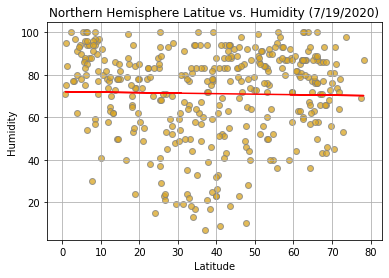

 R-squared is 0.0005228031011260589


<Figure size 432x288 with 0 Axes>

In [138]:
n_lat = northern_hemisphere_df ["Lat"]
n_hum = northern_hemisphere_df["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(n_lat, n_hum)
regress_values = n_lat * slope + intercept
line_eq = "y = " + str(round(slope,4)) + "x + " + str(round(intercept,4))
plt.plot(n_lat,regress_values,"r-")

plt.scatter(n_lat, n_hum,color="goldenrod", edgecolors="grey", alpha=0.75)
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Northern Hemisphere Latitue vs. Humidity (7/19/2020)")
plt.grid()
plt.show()
plt.savefig("Figures/Regression_North_Lat_vs_Humidity.png")
print(f" R-squared is {rvalue**2}")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

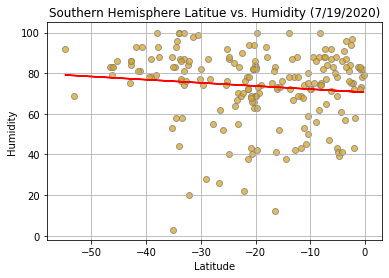

 R-squared is 0.012554036138391912


<Figure size 432x288 with 0 Axes>

In [139]:
s_lat = southern_hemisphere_df ["Lat"]
s_hum = southern_hemisphere_df ["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(s_lat, s_hum )
regress_values = s_lat * slope + intercept
line_eq = "y = " + str(round(slope,4)) + "x + " + str(round(intercept,4))
plt.plot(s_lat,regress_values,"r-")
plt.scatter(s_lat,s_hum,color="goldenrod", edgecolors="grey", alpha=0.75)
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Southern Hemisphere Latitue vs. Humidity (7/19/2020)")
plt.grid()
plt.show()
plt.savefig("Figures/Regression_South_Lat_vs_Humidity.png")
print(f" R-squared is {rvalue**2}")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

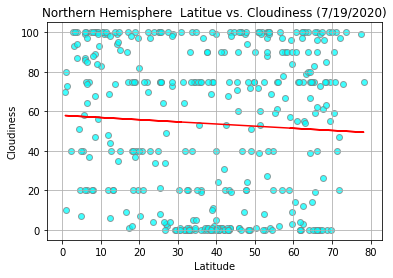

 R-squared is 0.003438061231189963


<Figure size 432x288 with 0 Axes>

In [140]:
n_lat = northern_hemisphere_df ["Lat"]
n_cloud = northern_hemisphere_df ["Cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(n_lat, n_cloud)
regress_values = n_lat* slope + intercept
line_eq = "y = " + str(round(slope,4)) + "x + " + str(round(intercept,4))
plt.plot(n_lat,regress_values,"r-")
plt.scatter(n_lat, n_cloud,color="aqua", edgecolors="grey", alpha=0.75)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Northern Hemisphere  Latitue vs. Cloudiness (7/19/2020)")
plt.grid()
plt.show()
plt.savefig("Figures/Regression_North_Lat_vs_Cloudiness.png")
print(f" R-squared is {rvalue**2}")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

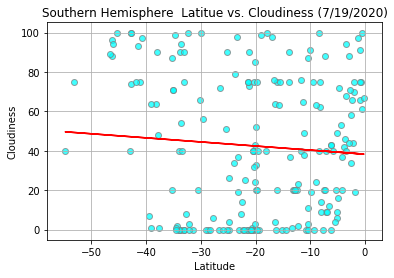

 R-squared is 0.005949791186768386


<Figure size 432x288 with 0 Axes>

In [141]:
s_lat = southern_hemisphere_df ["Lat"]
s_cloud = southern_hemisphere_df ["Cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(s_lat, s_cloud)
regress_values = s_lat* slope + intercept
line_eq = "y = " + str(round(slope,4)) + "x + " + str(round(intercept,4))
plt.plot(s_lat,regress_values,"r-")
plt.scatter(s_lat, s_cloud,color="aqua", edgecolors="grey", alpha=0.75)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Southern Hemisphere  Latitue vs. Cloudiness (7/19/2020)")
plt.grid()
plt.show()
plt.savefig("Figures/Regression_South_Lat_vs_Cloudiness.png")
print(f" R-squared is {rvalue**2}")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

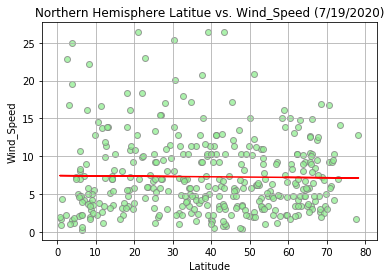

 R-squared is 0.0002650820240837628


<Figure size 432x288 with 0 Axes>

In [142]:
n_lat = northern_hemisphere_df ["Lat"]
n_wind = northern_hemisphere_df ["Wind_Speed"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(n_lat, n_wind)
regress_values = n_lat* slope + intercept
line_eq = "y = " + str(round(slope,4)) + "x + " + str(round(intercept,4))
plt.plot(n_lat,regress_values,"r-")
plt.scatter(n_lat, n_wind,color="lightgreen", edgecolors="grey", alpha=0.75)
plt.xlabel("Latitude")
plt.ylabel("Wind_Speed")
plt.title("Northern Hemisphere Latitue vs. Wind_Speed (7/19/2020)")
plt.grid()
plt.show()
plt.savefig("Figures/Regression_North_Lat_vs_Wind.png")
print(f" R-squared is {rvalue**2}")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

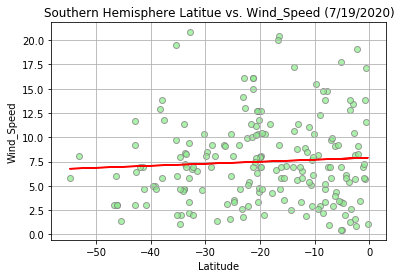

 R-squared is 0.0037538499405386175


<Figure size 432x288 with 0 Axes>

In [143]:
s_lat = southern_hemisphere_df ["Lat"]
s_wind = southern_hemisphere_df ["Wind_Speed"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(s_lat,s_wind)
regress_values = s_lat* slope + intercept
line_eq = "y = " + str(round(slope,4)) + "x + " + str(round(intercept,4))
plt.plot(s_lat,regress_values,"r-")
plt.scatter(s_lat, s_wind,color="lightgreen", edgecolors="grey", alpha=0.75)
plt.xlabel("Latitude")
plt.ylabel("Wind_Speed")
plt.title("Southern Hemisphere Latitue vs. Wind_Speed (7/19/2020)")
plt.grid()
plt.show()
plt.savefig("Figures/Regression_South_Lat_vs_Wind.png")
print(f" R-squared is {rvalue**2}")